In [146]:

#exploring dataset
import pickle
with open("train_label.pkl", 'rb') as f:
    labeltrain = pickle.load(f)
#making labels with 6 to 1 in labelset
labeltrain=[1 if x==6 else x for x in labeltrain]
set(labeltrain)#unique labels

{0, 1, 2, 3}

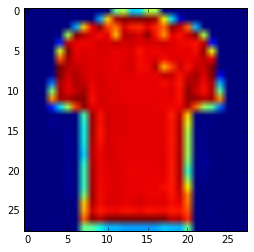

In [147]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np    #28*28 images of 4 classes
with open("train_image.pkl", 'rb') as f:
    data = pickle.load(f)
plt.imshow(np.array(data[700]).reshape((28, 28)))
plt.show()

In [148]:
import tensorflow as tf
import pandas as pd

from sklearn.model_selection import train_test_split


In [149]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(data, labeltrain, test_size=0.05,shuffle=True)
#testsize f 400 samples from training data kept aside

In [150]:
print (len(X_train), len(y_train))
print()
# print(X_test.size, y_test.size)

7600 7600



Normalizing helped in making values of matrix image b/w 0 and 1.

In [151]:
#noramilize the data
X_train=tf.keras.utils.normalize(X_train)
X_test=tf.keras.utils.normalize(X_test)

In [152]:
X_train.shape #6400 images with 28*28=784 size

(7600, 784)

In [72]:
# type(X_train)
# X_train = tf.convert_to_tensor(X_train, np.float32)
# X_train.shape

TensorShape([Dimension(6400), Dimension(784)])

Creating a sequential model to in tensorflow with 3dense layers activated with relu function and last one with softmax

In [153]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(4,activation=tf.nn.softmax))

In [154]:
#loss and optimiser for the model has been defined for compiling
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [155]:
model.fit(X_train,np.array(y_train),epochs=100)
#fitting the model for training,in each epoch all 7600 images are processed

Epoch 1/100
7600/7600 [==============================] - 1s 150us/step - loss: 0.7058 - acc: 0.7108
Epoch 2/100
7600/7600 [==============================] - 0s 61us/step - loss: 0.5102 - acc: 0.7954
Epoch 3/100
7600/7600 [==============================] - 0s 59us/step - loss: 0.4639 - acc: 0.8164
Epoch 4/100
7600/7600 [==============================] - 0s 61us/step - loss: 0.4404 - acc: 0.8264
Epoch 5/100
7600/7600 [==============================] - 0s 61us/step - loss: 0.4227 - acc: 0.8316
Epoch 6/100
7600/7600 [==============================] - 0s 60us/step - loss: 0.4028 - acc: 0.8407
Epoch 7/100
7600/7600 [==============================] - 0s 63us/step - loss: 0.3797 - acc: 0.8512
Epoch 8/100
7600/7600 [==============================] - 1s 70us/step - loss: 0.3726 - acc: 0.8576
Epoch 9/100
7600/7600 [==============================] - 1s 70us/step - loss: 0.3657 - acc: 0.8551
Epoch 10/100
7600/7600 [==============================] - 0s 62us/step - loss: 0.3477 - acc: 0.8641
Epoch 11

7600/7600 [==============================] - 1s 69us/step - loss: 0.0288 - acc: 0.9904
Epoch 83/100
7600/7600 [==============================] - 1s 67us/step - loss: 0.0417 - acc: 0.9854
Epoch 84/100
7600/7600 [==============================] - 1s 70us/step - loss: 0.0374 - acc: 0.9862
Epoch 85/100
7600/7600 [==============================] - 1s 67us/step - loss: 0.0476 - acc: 0.9822
Epoch 86/100
7600/7600 [==============================] - 1s 68us/step - loss: 0.0654 - acc: 0.9766
Epoch 87/100
7600/7600 [==============================] - 1s 67us/step - loss: 0.0217 - acc: 0.9928
Epoch 88/100
7600/7600 [==============================] - 1s 66us/step - loss: 0.0159 - acc: 0.9953
Epoch 89/100
7600/7600 [==============================] - 1s 67us/step - loss: 0.0260 - acc: 0.9920
Epoch 90/100
7600/7600 [==============================] - 1s 70us/step - loss: 0.0298 - acc: 0.9889
Epoch 91/100
7600/7600 [==============================] - 1s 67us/step - loss: 0.0387 - acc: 0.9857
Epoch 92/100


In [156]:
val_loss,val_acc=model.evaluate(X_test,y_test)

400/400 [==============================] - 0s 673us/step


In [157]:
print(val_loss,val_acc)

1.35140522242 0.815


In [ ]:
#model.save("mark1.model")
#saving this model to load again later

In [ ]:
#new_model=tf.keras.models.load_model('mark1.model')

In [158]:
print(np.argmax(model.predict([X_test])[0]))
#checking predictions

1


In [159]:
with open("test_image.pkl", 'rb') as f:
    testdata = pickle.load(f)


Finally,predicting the class for each image in testfile and reassigning the class 1 to 6 to revert the change of name done earlier

In [ ]:
final_predictions_mark1=[]
for i in range(len(testdata)):
    final_predictions_mark1.append(np.argmax(model.predict([testdata])[i]))
    if i%100==0:
        print(i)
final_predictions_mark1=[6 if x==1 else x for x in final_predictions_mark1]


exporting the predictions in csv file for test images with index starting from 0

In [161]:
import pandas as pd
res = final_predictions_mark1
my_df = pd.DataFrame(res)
my_df.to_csv('mark1predict.csv', index=True, header=False)
my_df

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
